# Introduction

The champions league is one of the top watched football leagues in the world. Starting from the group stage, 32 of the best teams in Europe compete to win the champions league cup.
We'll be analysing and answering some questions regarding the season of 2020-2021, where Chelsea has managed to win the league, beating man city 0 - 1.
We'll go through some stats regarding home teams and away teams performance overall in that season and see what kind of interesting things we can find.

# Getting started

Lets import the libraries first

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the dataset

In [2]:
df = pd.read_csv('champions_league_2020-2021_results.csv')

lets take a look at the data

In [3]:
df

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,shots_on_target_away,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,location,events_list,lineup_home,lineup_away
0,Final,29.05.2021,False,False,False,Manchester City,Chelsea,0,1,61%,...,2,50%,50%,55%,3%,42%,Estádio Do Dragão,"[{'event_team': 'home', 'event_time': "" 34' "",...","[{'player_name': ' Sterling ', 'player_number'...","[{'player_name': ' Werner ', 'player_number': ..."
1,Semi-finals second leg,05.05.2021,False,False,False,Chelsea,Real Madrid,2,0,32%,...,5,52%,49%,43%,3%,54%,Stamford Bridge,"[{'event_team': 'home', 'event_time': "" 14' "",...","[{'player_name': ' Werner ', 'player_number': ...","[{'player_name': ' Hazard ', 'player_number': ..."
2,Semi-finals second leg,04.05.2021,False,False,False,Manchester City,PSG,2,0,44%,...,0,53%,47%,44%,3%,53%,Etihad Stadium,"[{'event_team': 'home', 'event_time': "" 11' "",...","[{'player_name': ' Silva ', 'player_number': '...","[{'player_name': ' Neymar ', 'player_number': ..."
3,Semi-finals first leg,28.04.2021,False,False,False,PSG,Manchester City,1,2,40%,...,6,47%,53%,65%,4%,31%,Parc des Princes,"[{'event_team': 'home', 'event_time': "" 15' "",...","[{'player_name': ' Mbappe ', 'player_number': ...","[{'player_name': ' Foden ', 'player_number': '..."
4,Semi-finals first leg,27.04.2021,False,False,False,Real Madrid,Chelsea,1,1,51%,...,5,49%,52%,61%,4%,35%,Alfredo Di Stéfano,"[{'event_team': 'away', 'event_time': "" 14' "",...","[{'player_name': ' Junior ', 'player_number': ...","[{'player_name': ' Werner ', 'player_number': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Group stage: Matchday 1,20.10.2020,False,False,False,Rennes,Krasnodar,1,1,63%,...,3,49%,51%,83%,6%,11%,Roazhon Park,"[{'event_team': 'away', 'event_time': "" 14' "",...","[{'player_name': ' Terrier ', 'player_number':...","[{'player_name': ' Berg ', 'player_number': ' ..."
121,Group stage: Matchday 1,20.10.2020,False,False,False,Barcelona,Ferencváros,5,1,62%,...,2,62%,38%,91%,1%,8%,Camp Nou,"[{'event_team': 'home', 'event_time': "" 27' "",...","[{'player_name': ' Messi ', 'player_number': '...","[{'player_name': ' Chol Nguen ', 'player_numbe..."
122,Group stage: Matchday 1,20.10.2020,False,False,False,Lazio,Borussia Dortmund,3,1,35%,...,7,47%,53%,24%,5%,71%,Olimpico,"[{'event_team': 'home', 'event_time': "" 6' "", ...","[{'player_name': ' Immobile ', 'player_number'...","[{'player_name': ' Haaland ', 'player_number':..."
123,Group stage: Matchday 1,20.10.2020,False,False,False,Zenit,Club Brugge,1,2,52%,...,5,45%,55%,64%,8%,28%,Saint Petersburg Stadium,"[{'event_team': 'away', 'event_time': "" 12' "",...","[{'player_name': ' Dzyuba ', 'player_number': ...","[{'player_name': ' De Ketelaere ', 'player_num..."


# Data cleaning

Lets look at the data shape

In [4]:
print(df.shape)

(125, 24)


We don't need every column here for our project, so we will remove the columns we don't need.

In [5]:
df = df.drop(['pens', 'pens_home_score', 'pens_away_score', 'duels_won_home', 'duels_won_away', 'prediction_team_home_win',
              'prediction_draw', 'prediction_team_away_win', 'events_list', 'lineup_home', 'lineup_away'], axis=1)

Lets take a look at the data frame after we removed the unwanted columns

In [6]:
df

,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,location
0,Final,29.05.2021,Manchester City,Chelsea,0,1,61%,39%,7,8,1,2,Estádio Do Dragão
1,Semi-finals second leg,05.05.2021,Chelsea,Real Madrid,2,0,32%,68%,15,7,5,5,Stamford Bridge
2,Semi-finals second leg,04.05.2021,Manchester City,PSG,2,0,44%,56%,12,14,5,0,Etihad Stadium
3,Semi-finals first leg,28.04.2021,PSG,Manchester City,1,2,40%,60%,10,11,4,6,Parc des Princes
4,Semi-finals first leg,27.04.2021,Real Madrid,Chelsea,1,1,51%,49%,9,11,1,5,Alfredo Di Stéfano
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Group stage: Matchday 1,20.10.2020,Rennes,Krasnodar,1,1,63%,37%,20,10,7,3,Roazhon Park
121,Group stage: Matchday 1,20.10.2020,Barcelona,Ferencváros,5,1,62%,38%,22,8,11,2,Camp Nou
122,Group stage: Matchday 1,20.10.2020,Lazio,Borussia Dortmund,3,1,35%,65%,11,14,4,7,Olimpico
123,Group stage: Matchday 1,20.10.2020,Zenit,Club Brugge,1,2,52%,48%,14,13,3,5,Saint Petersburg Stadium


# Data Wrangling

We'll drop any row with a missing value if any

In [7]:
df = df.dropna()

Lets check if any rows were actually dropped

In [8]:
df

,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,location
0,Final,29.05.2021,Manchester City,Chelsea,0,1,61%,39%,7,8,1,2,Estádio Do Dragão
1,Semi-finals second leg,05.05.2021,Chelsea,Real Madrid,2,0,32%,68%,15,7,5,5,Stamford Bridge
2,Semi-finals second leg,04.05.2021,Manchester City,PSG,2,0,44%,56%,12,14,5,0,Etihad Stadium
3,Semi-finals first leg,28.04.2021,PSG,Manchester City,1,2,40%,60%,10,11,4,6,Parc des Princes
4,Semi-finals first leg,27.04.2021,Real Madrid,Chelsea,1,1,51%,49%,9,11,1,5,Alfredo Di Stéfano
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Group stage: Matchday 1,20.10.2020,Rennes,Krasnodar,1,1,63%,37%,20,10,7,3,Roazhon Park
121,Group stage: Matchday 1,20.10.2020,Barcelona,Ferencváros,5,1,62%,38%,22,8,11,2,Camp Nou
122,Group stage: Matchday 1,20.10.2020,Lazio,Borussia Dortmund,3,1,35%,65%,11,14,4,7,Olimpico
123,Group stage: Matchday 1,20.10.2020,Zenit,Club Brugge,1,2,52%,48%,14,13,3,5,Saint Petersburg Stadium


Good, so our data frame doesn't have any missing values.

Lets create a new column for us to easily identify the winner in a matche.
This one is a bit more complecated. The way I'm going to do this is to first make a new column naming it match_win_status, and I'll fill each column with 1 of 3 categorical values:

1. Home: if the home team was the winner in that match.
2. Tide: If that match was tied.
3. Away: if the away team was the winner in that match.

I'll be going through every row to fill that column. The columns "team_home_score" and "team_away_score" are enough to tell me the info I want to know, and the logic is this:

1. if team_home_score > team_away_score then home team won.
2. if team_home_score < team_away_score then away team won.
3. if team_home_score == team_away_score then match ended on a draw.

We will create a function named match_win that does the steps above, accepting a list as a parameter and then returning it filled with the match winning categories.

In [9]:
def match_win(match_win_list=[]):
    ''' Returns a list with the matches winning status. '''
    
    for index, row in df.iterrows():
        if row['team_home_score'] > row['team_away_score']:
            match_win_list.append('home')
        if row['team_home_score'] == row['team_away_score']:
            match_win_list.append('draw')
        if row['team_home_score'] < row['team_away_score']:
            match_win_list.append('away')
    return match_win_list

In [11]:
# We'll call the function we created above and assign its output to a new column called match_win_status
match_win_status =[]
df['match_win_status'] = match_win(match_win_status)

We won't be checking for double entries because in our case it's okay to have them actually.
I also know some of the columns hold categorical values and should be probably converted to numbers for applying machine learning models but I won't be converting them because we wouldn't be doing any machine learning for this project, plus, it's easier for non-technical people to read the table in the blog post.

# Features list

Now our dataset contains the following features:

1. Stage: The stage of the match in that season.
2. date: Match date.
3. team_name_home: The home team for the match.
4. team_name_away: The away team for the match.
5. team_home_score: Final score for the home team.
6. team_away_score: Final score for the away team.
7. possession_home: The possession rate for the home team in the match.
8. possession_away: The possession rate for the away team in the match.
9. total_shots_home: The total shots for the home team.
10. total_shots_away: The total shots for away team.
11. shots_on_target_home: Shots on target for home team.
12. shots_on_target_away: Total shots on target for away team.
13. location: The stadium of the match.
14. match_win_status: Status of winning in that match: (home, away, or draw).

# Data exploration

## Question 1: What was the largest score for home and away teams?

For home teams

In [12]:
# Sort values by home_team_score
df.sort_values(by=['team_home_score'], inplace=False, ascending=False)

,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,location,match_win_status
97,Group stage: Matchday 2,28.10.2020,Manchester United,RB Leipzig,5,0,47%,53%,15,9,8,2,Old Trafford,home
35,Group stage: Matchday 6,09.12.2020,PSG,İstanbul Başakşehir,5,1,69%,31%,20,10,9,4,Parc des Princes,home
121,Group stage: Matchday 1,20.10.2020,Barcelona,Ferencváros,5,1,62%,38%,22,8,11,2,Camp Nou,home
67,Group stage: Matchday 4,25.11.2020,B. M‘Gladbach,Shakhtar Donetsk,4,0,46%,54%,14,13,6,3,BORUSSIA-PARK,home
73,Group stage: Matchday 4,24.11.2020,Manchester United,İstanbul Başakşehir,4,1,52%,48%,16,13,8,4,Old Trafford,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Group stage: Matchday 4,25.11.2020,Liverpool,Atalanta,0,2,54%,46%,4,8,0,4,Anfield,away
68,Group stage: Matchday 4,25.11.2020,Olympiacos,Manchester City,0,1,40%,60%,2,22,0,11,Georgios Karaiskakis Stadium,away
70,Group stage: Matchday 4,24.11.2020,Dynamo Kyiv,Barcelona,0,4,30%,70%,7,16,3,7,Kiev Olympic Stadium,away
79,Group stage: Matchday 3,04.11.2020,Club Brugge,Borussia Dortmund,0,3,46%,54%,11,11,4,6,Jan Breydelstadion,away


For away teams

In [13]:
# Sort values by away_team_score
df.sort_values(by=['team_away_score'], inplace=False, ascending=False)

,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,location,match_win_status
92,Group stage: Matchday 3,03.11.2020,Shakhtar Donetsk,B. M‘Gladbach,0,6,55%,45%,4,20,1,10,Kiev Olympic Stadium,away
87,Group stage: Matchday 3,03.11.2020,Salzburg,Bayern Munich,2,6,40%,60%,18,21,10,10,Red Bull Arena Salzburg,away
90,Group stage: Matchday 3,03.11.2020,Atalanta,Liverpool,0,5,43%,57%,9,15,6,12,Gewiss Stadium,away
50,Group stage: Matchday 5,02.12.2020,Sevilla,Chelsea,0,4,56%,44%,17,14,3,7,Ramón Sánchez-Pizjuán,away
99,Group stage: Matchday 2,28.10.2020,Krasnodar,Chelsea,0,4,29%,71%,13,16,4,7,Krasnodar Stadium,away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Group stage: Matchday 2,28.10.2020,Sevilla,Rennes,1,0,66%,34%,23,2,10,2,Ramón Sánchez-Pizjuán,home
34,Group stage: Matchday 6,09.12.2020,Manchester City,Marseille,3,0,53%,47%,15,8,8,2,Etihad Stadium,home
96,Group stage: Matchday 2,28.10.2020,Borussia Dortmund,Zenit,2,0,70%,30%,11,4,5,0,SIGNAL IDUNA PARK,home
32,Group stage: Matchday 6,09.12.2020,Inter,Shakhtar Donetsk,0,0,57%,43%,20,7,4,3,Giuseppe Meazza,draw


## Question 2: What was the highest possession rate for a home and away team?

For a home team

In [14]:
# Sort values by possession_home, the possession rate for home teams
df.sort_values(by=['possession_home'], inplace=False, ascending=False)

,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,location,match_win_status
30,Group stage: Matchday 6,09.12.2020,Bayern Munich,Lokomotiv Moscow,2,0,70%,30%,22,7,7,3,Allianz Arena,home
96,Group stage: Matchday 2,28.10.2020,Borussia Dortmund,Zenit,2,0,70%,30%,11,4,5,0,SIGNAL IDUNA PARK,home
35,Group stage: Matchday 6,09.12.2020,PSG,İstanbul Başakşehir,5,1,69%,31%,20,10,9,4,Parc des Princes,home
112,Group stage: Matchday 1,21.10.2020,Manchester City,FC Porto,3,1,69%,31%,9,6,6,2,Etihad Stadium,home
19,Round of 16 second leg,09.03.2021,Juventus,FC Porto,3,2,69%,31%,31,14,13,7,Allianz Stadium,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Round of 16 first leg,24.02.2021,Atalanta,Real Madrid,0,1,31%,69%,2,19,0,4,Gewiss Stadium,away
83,Group stage: Matchday 3,04.11.2020,İstanbul Başakşehir,Manchester United,2,1,31%,69%,9,10,3,2,3.Istanbul Basaksehir Fatih Terim,home
70,Group stage: Matchday 4,24.11.2020,Dynamo Kyiv,Barcelona,0,4,30%,70%,7,16,3,7,Kiev Olympic Stadium,away
99,Group stage: Matchday 2,28.10.2020,Krasnodar,Chelsea,0,4,29%,71%,13,16,4,7,Krasnodar Stadium,away


For an away team

In [15]:
# Sort values by possession_away, the possession rate for away teams
df.sort_values(by=['possession_away'], inplace=False, ascending=False)

,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,location,match_win_status
17,Round of 16 second leg,10.03.2021,PSG,Barcelona,1,1,27%,73%,7,21,3,10,Parc des Princes,draw
99,Group stage: Matchday 2,28.10.2020,Krasnodar,Chelsea,0,4,29%,71%,13,16,4,7,Krasnodar Stadium,away
70,Group stage: Matchday 4,24.11.2020,Dynamo Kyiv,Barcelona,0,4,30%,70%,7,16,3,7,Kiev Olympic Stadium,away
20,Round of 16 second leg,09.03.2021,Borussia Dortmund,Sevilla,2,2,31%,69%,9,19,5,8,SIGNAL IDUNA PARK,draw
21,Round of 16 first leg,24.02.2021,Atalanta,Real Madrid,0,1,31%,69%,2,19,0,4,Gewiss Stadium,away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Group stage: Matchday 1,21.10.2020,Manchester City,FC Porto,3,1,69%,31%,9,6,6,2,Etihad Stadium,home
19,Round of 16 second leg,09.03.2021,Juventus,FC Porto,3,2,69%,31%,31,14,13,7,Allianz Stadium,home
35,Group stage: Matchday 6,09.12.2020,PSG,İstanbul Başakşehir,5,1,69%,31%,20,10,9,4,Parc des Princes,home
30,Group stage: Matchday 6,09.12.2020,Bayern Munich,Lokomotiv Moscow,2,0,70%,30%,22,7,7,3,Allianz Arena,home


## Question 3: How many times did home and away teams actually win their matches?

Text(0, 0.5, 'Count')

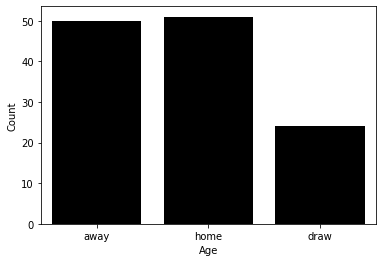

In [16]:
# Showing a graph of match winning status for home and away teams
sns.countplot(data=df, x='match_win_status', color='black')
plt.xlabel('Age')
plt.ylabel('Count')